COMPARACION DE METODOS

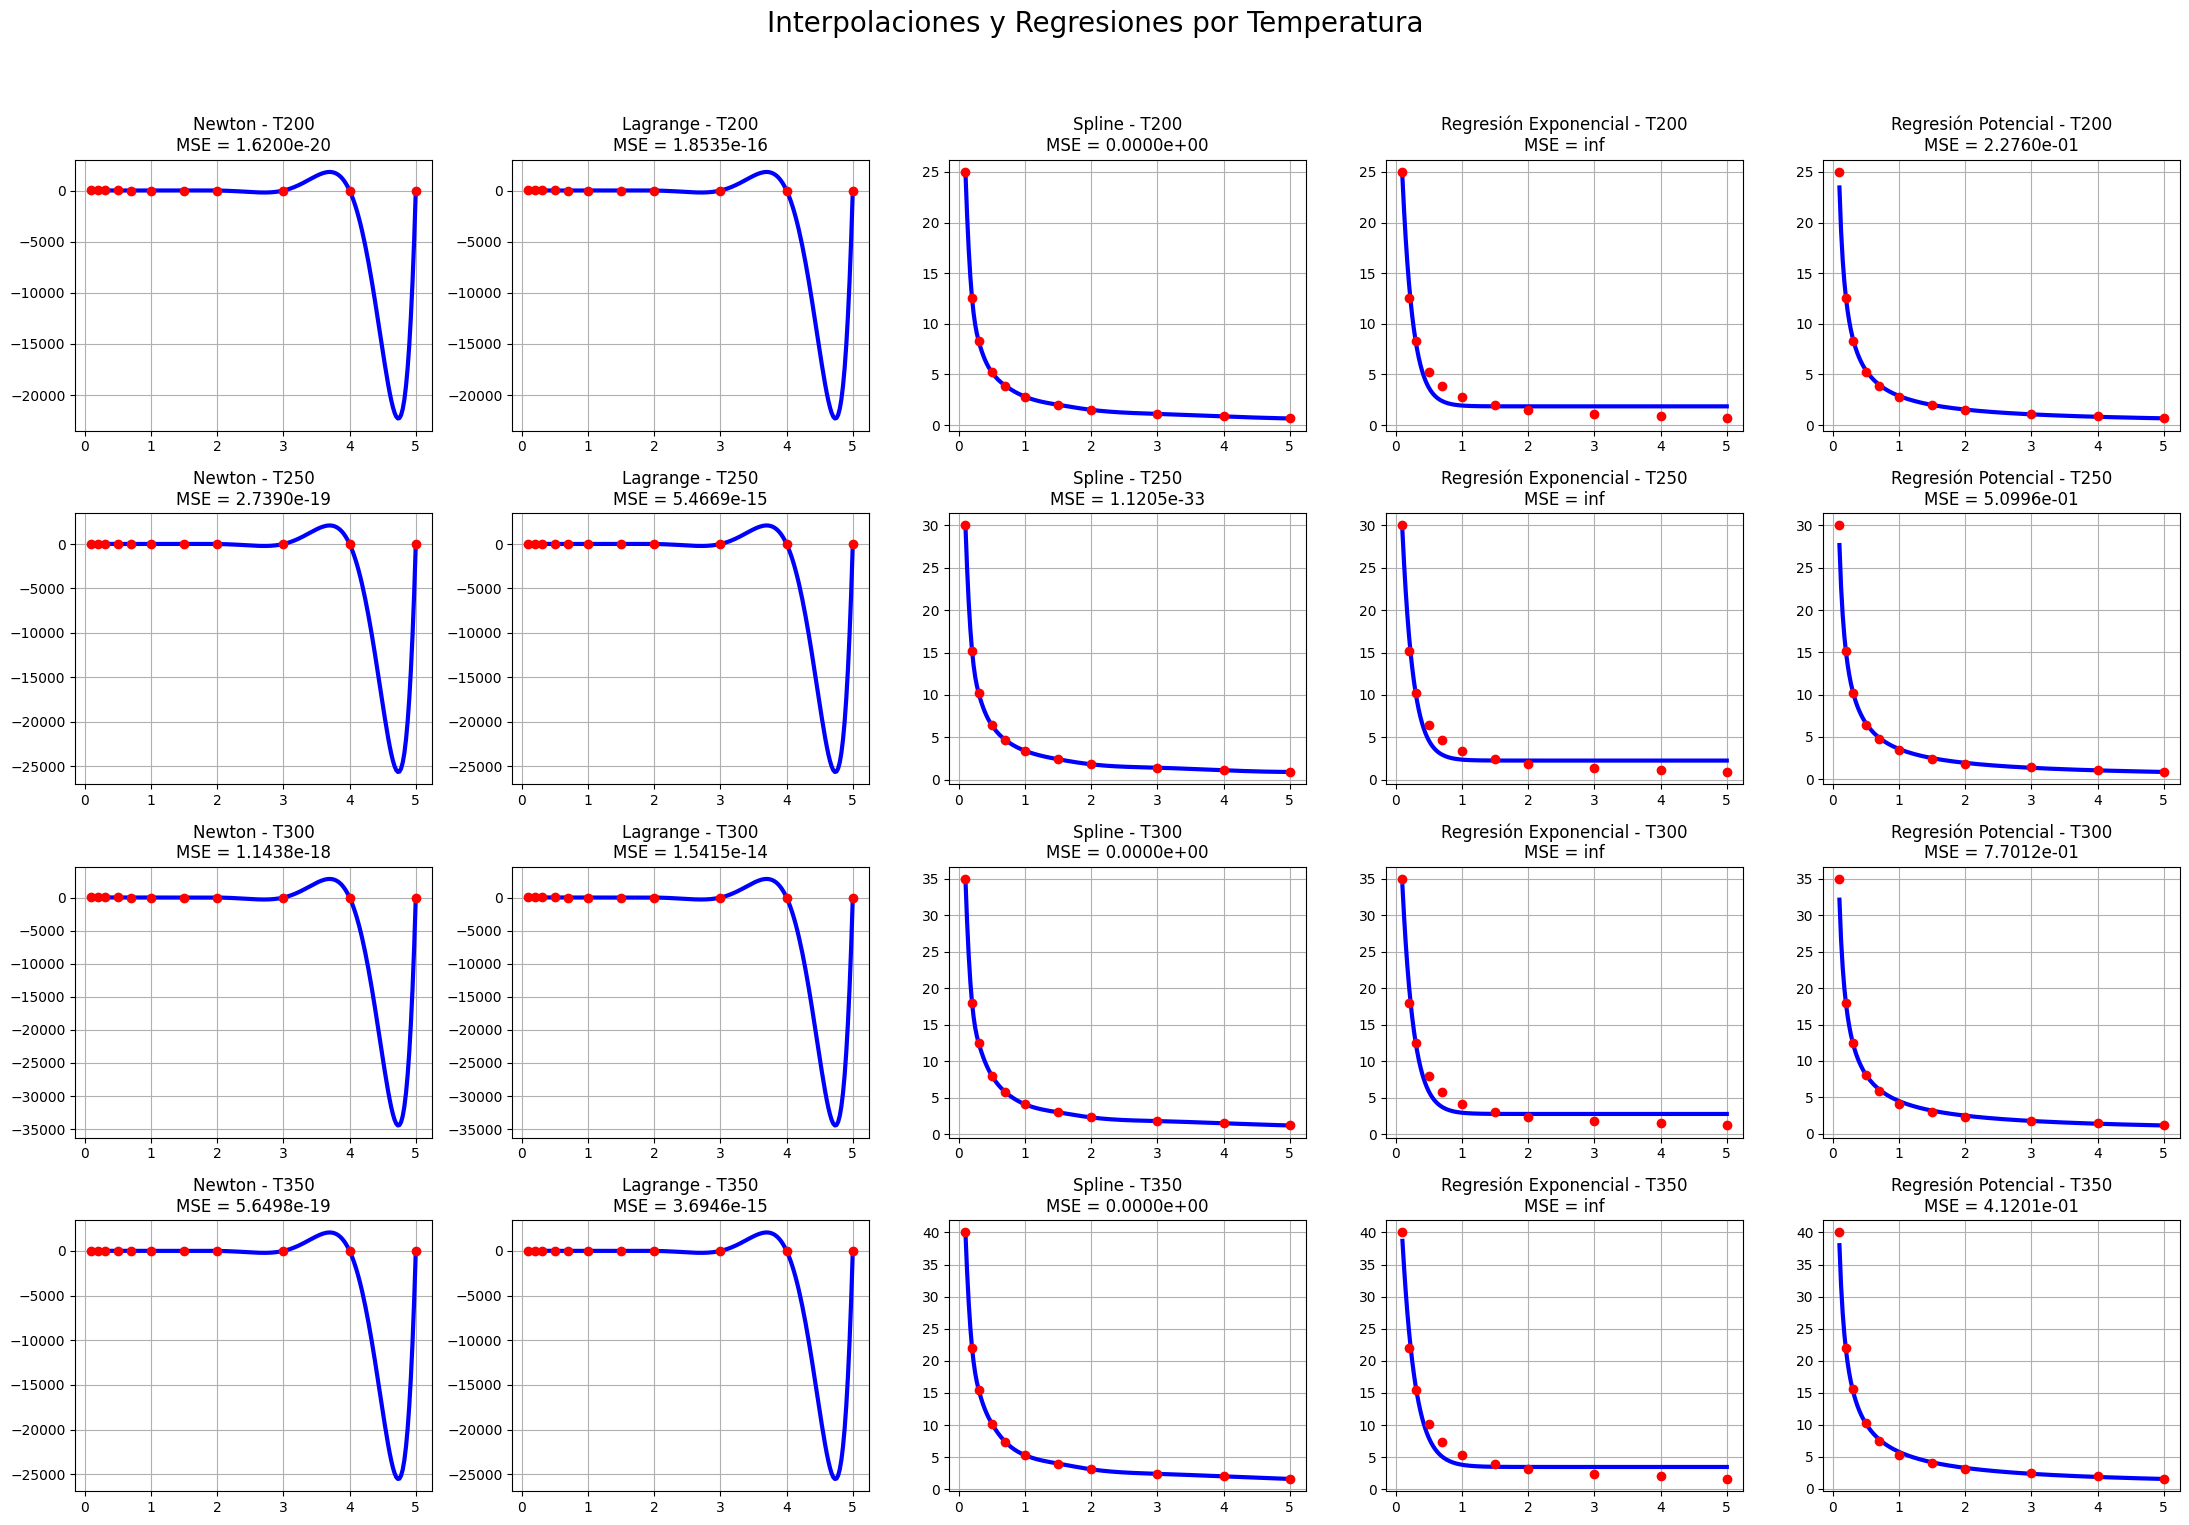


🏆 Mejores métodos por temperatura (con resaltado en gráfico):

T200: Spline (MSE = 0.000000e+00)
T250: Spline (MSE = 1.120541e-33)
T300: Spline (MSE = 0.000000e+00)
T350: Spline (MSE = 0.000000e+00)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator, CubicSpline, lagrange
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# === DATOS
datos = {
    'T200': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [25.0,12.5,8.3,5.2,3.9,2.8,2.0,1.5,1.1,0.85,0.65]},
    'T250': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]},
    'T300': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [35.0,18.0,12.5,8.0,5.8,4.1,3.0,2.3,1.8,1.5,1.2]},
    'T350': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [40.0,22.0,15.5,10.2,7.4,5.3,4.0,3.1,2.4,2.0,1.6]},
}

temperaturas = ['T200', 'T250', 'T300', 'T350']
metodos = ['Newton', 'Lagrange', 'Spline', 'Regresión Exponencial', 'Regresión Potencial']
errores = {temp: {} for temp in temperaturas}
mejores_metodos = {}

# === FIGURA
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(22, 16))
fig.suptitle("Interpolaciones y Regresiones por Temperatura", fontsize=20)

for i, temp in enumerate(temperaturas):
    x = datos[temp]['P']
    y = datos[temp]['V']

    for j, metodo in enumerate(metodos):
        ax = axs[i, j]
        try:
            if metodo == 'Newton':
                f = KroghInterpolator(x, y)

            elif metodo == 'Lagrange':
                pol = lagrange(x, y)
                f = lambda xv: pol(xv)

            elif metodo == 'Spline':
                f = CubicSpline(x, y)

            elif metodo == 'Regresión Exponencial':
                def modelo_exp(xv, a, b, c, d):
                    return a * np.exp(-b * xv / d) + c
                popt, _ = curve_fit(modelo_exp, x, y, p0=[1, 1, 1, 1])
                f = lambda xv: modelo_exp(xv, *popt)

            elif metodo == 'Regresión Potencial':
                # Transformar log-log para ajuste lineal: ln(y) = ln(a) + b ln(x)
                x_log = np.log(x)
                y_log = np.log(y)
                b, log_a = np.polyfit(x_log, y_log, 1)
                a = np.exp(log_a)
                f = lambda xv: a * (xv ** b)

            x_plot = np.linspace(min(x), max(x), 200)
            y_plot = f(x_plot)
            y_pred = f(x)
            mse = mean_squared_error(y, y_pred)
            errores[temp][metodo] = mse

        except Exception:
            f = None
            mse = np.inf
            errores[temp][metodo] = mse

        try:
            mejor_metodo = min(errores[temp], key=errores[temp].get)
            if metodo == mejor_metodo:
                ax.plot(x_plot, y_plot, label='Mejor método ⭐', color='blue', linewidth=3)
            else:
                ax.plot(x_plot, y_plot, label='Interpolación',color="blue", linewidth=3)

            ax.plot(x, y, 'ro', label='Datos')
            ax.set_title(f"{metodo} - {temp}\nMSE = {mse:.4e}")
            ax.grid(True)

        except Exception:
            ax.text(0.5, 0.5, 'Error', ha='center', va='center')
            ax.set_title(f"{metodo} - {temp}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === CONSOLA: MEJORES MÉTODOS
print("\n🏆 Mejores métodos por temperatura (con resaltado en gráfico):\n")
for temp in temperaturas:
    mejor = min(errores[temp], key=errores[temp].get)
    mse = errores[temp][mejor]
    print(f"{temp}: {mejor} (MSE = {mse:.6e})")
